# Lecture 8 - NOTES

## Data viz

In [1]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(42)

In [2]:
import names
name_pool =  [names.get_first_name() for _ in range(10)]
df1 = pd.DataFrame({'name': rng.choice(name_pool,5, replace=False) , 'age':  rng.choice(range(18,80),5) })
df2 = pd.DataFrame({'name': rng.choice(name_pool,5, replace=False) , 'height':  rng.choice(range(150,190),5) })

In [3]:
df1.merge(df2, on='name') # default how='inner'

,name,age,height
0,Mark,23,175
1,Rita,78,182
2,Janey,65,181


In [4]:
df1.merge(df2, how='outer', on='name') # default how='inner'

,name,age,height
0,Janey,65.0,181.0
1,Lillian,NaN,187.0
2,Lisa,NaN,166.0
3,Mark,23.0,175.0
4,Ralph,63.0,NaN
5,Rita,78.0,182.0
6,Sherie,50.0,NaN


In [5]:
df1.name.duplicated().sum()
df2.name.duplicated().sum()

np.int64(0)

In [6]:
fmh = pd.read_csv("data/framingham.csv")
df = fmh[["RANDID", "ANGINA", "CVD", "DEATH"]].head(3)
df

,RANDID,ANGINA,CVD,DEATH
0,2448,0,1,0
1,9428,0,0,0
2,14367,0,0,0


In [7]:
df_long = pd.melt(frame=df, id_vars='RANDID', value_vars=["ANGINA", "CVD", "DEATH"], var_name='EVENT', value_name='VALUE')
df_long

,RANDID,EVENT,VALUE
0,2448,ANGINA,0
1,9428,ANGINA,0
2,14367,ANGINA,0
3,2448,CVD,1
4,9428,CVD,0
5,14367,CVD,0
6,2448,DEATH,0
7,9428,DEATH,0
8,14367,DEATH,0


In [9]:
df_wide = df_long.pivot(index='RANDID', columns='EVENT', values='VALUE').reset_index().rename_axis(None,axis=1)
df_wide

,RANDID,ANGINA,CVD,DEATH
0,2448,0,1,0
1,9428,0,0,0
2,14367,0,0,0


# Matplotlib

impoprt 
x_ = rng.standard_normal(100)
plt.plot(x_); 

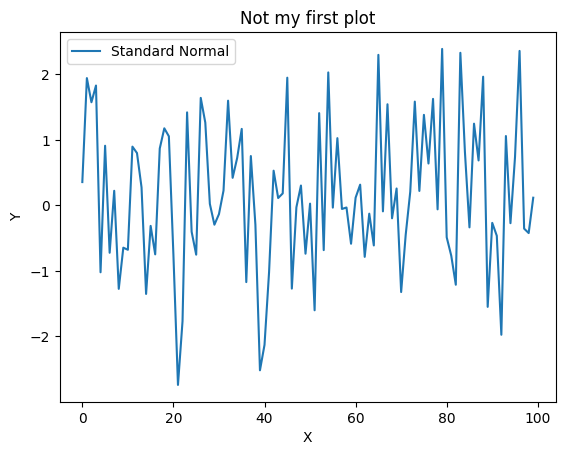

In [42]:
import matplotlib.pyplot as plt 

x = rng.standard_normal(100)
plt.plot(x)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Not my first plot")
plt.legend(["Standard Normal"])

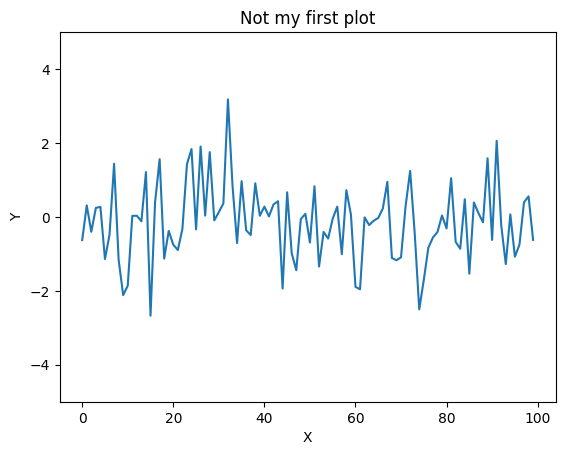

In [24]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x_)
ax.set_title('Not my first plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_ylim([-5,5]);

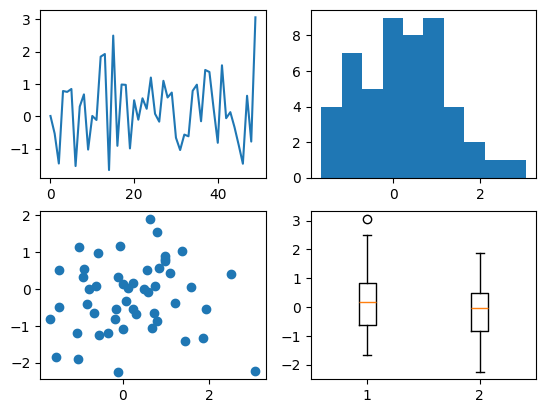

In [41]:
x_ = rng.standard_normal(50)
y_ = rng.standard_normal(50)
fig, axes = plt.subplots(2,2, dpi=100) # sharex, sharey, figsize, dpi
axes[0,0].plot(x_)
axes[0,1].hist(x_)
axes[1,0].scatter(x_,y_)
axes[1,1].boxplot([x_,y_]);

In [45]:
import seaborn as sns

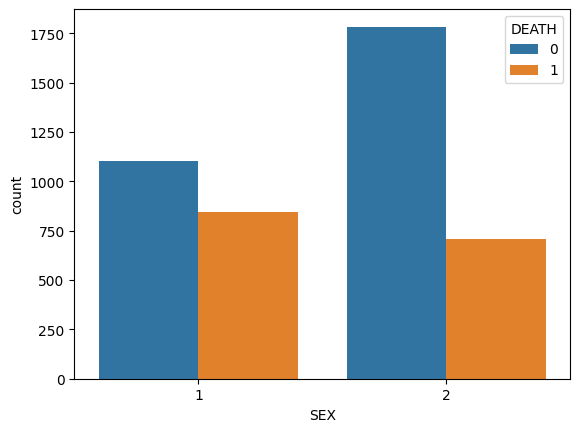

In [51]:
ax = sns.countplot(data=fmh,x='SEX', hue='DEATH') # y='SEX', stat={'precent',...}

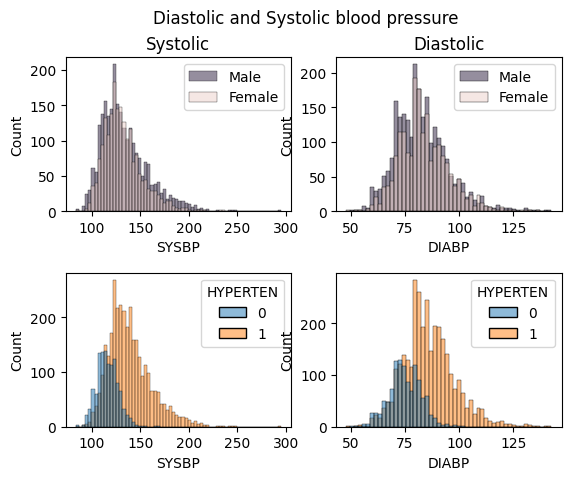

In [ ]:
fig, axes = plt.subplots(2,2)

# add labels and titles
fig.suptitle("Diastolic and Systolic blood pressure")
axes[0,0].set_title("Systolic")
axes[0,1].set_title("Diastolic")

# place different plots inside the grid
sns.histplot(data=fmh,x='SYSBP', hue='SEX', ax=axes[0,0]).legend(["Male", "Female"])
sns.histplot(data=fmh,x='DIABP', hue='SEX', ax=axes[0,1]).legend(["Male", "Female"])
sns.histplot(data=fmh,x='SYSBP', hue='HYPERTEN', ax=axes[1,0])
sns.histplot(data=fmh,x='DIABP', hue='HYPERTEN', ax=axes[1,1])

fig.subplots_adjust(hspace=.4)

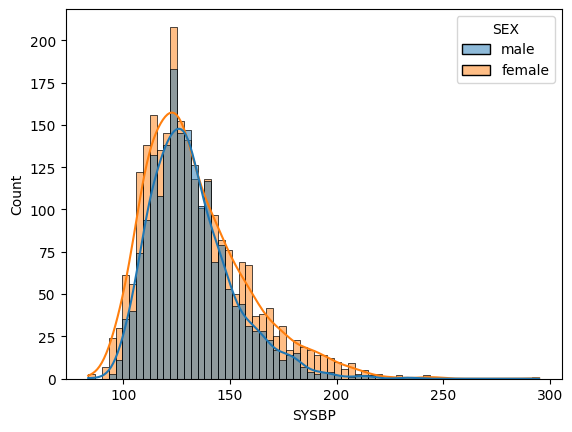

In [57]:
# convert 'SEX' [1,2]=>['male','female']
fmh['SEX'] = fmh.SEX.astype('category').cat.rename_categories(['male', 'female'])
# Density line can be added by setting `kde=True`
sns.histplot(data=fmh,x='SYSBP', hue='SEX', kde=True);

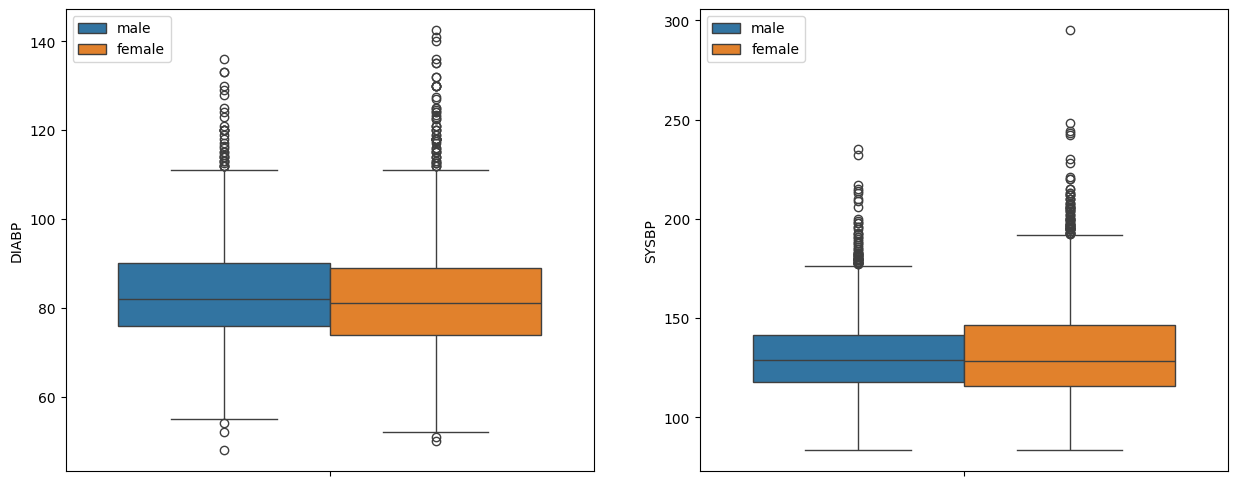

In [63]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.boxplot(data=fmh,y='SYSBP', hue='SEX', ax=axes[1])
sns.boxplot(data=fmh,y='DIABP', hue='SEX', ax=axes[0])
# legends

axes[0].legend(loc="upper left")
axes[1].legend(loc="upper left");

Text(0.5, 1.0, 'My density plot')

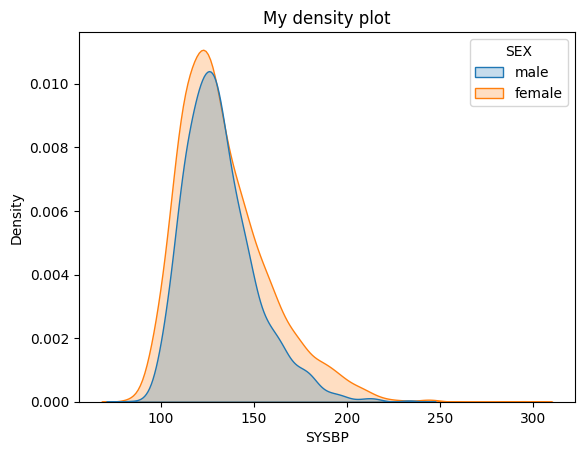

In [64]:
# kernel density estimate
ax = sns.kdeplot(data=fmh,x='SYSBP', hue='SEX', fill=True)
ax.set_title('My density plot')

(0.0, 500.0)

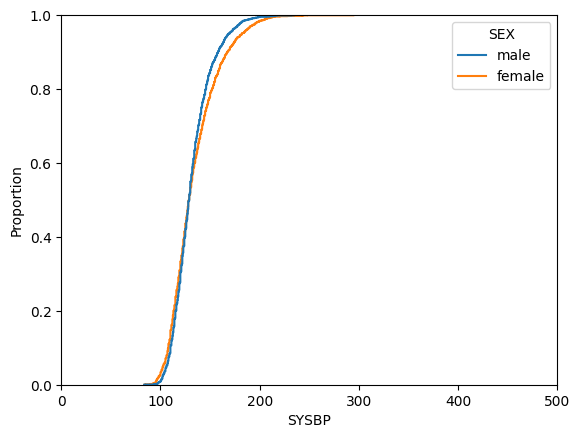

In [69]:
# empirical cumulative distribution function
ax = sns.ecdfplot(data=fmh,x='SYSBP', hue='SEX')
ax.set_xlim(0, 500)

<Axes: xlabel='AGE', ylabel='HEARTRTE'>

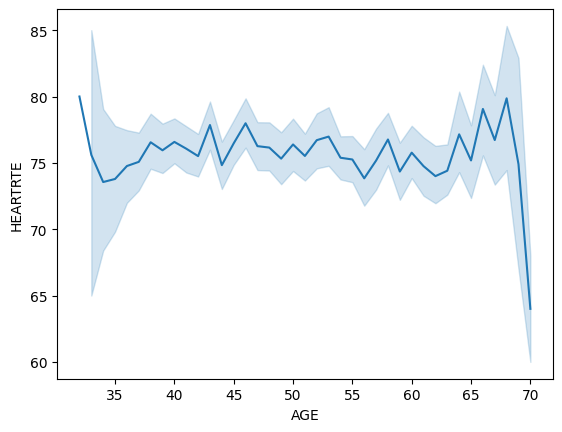

In [71]:
sns.lineplot(data=fmh, x='AGE', y='HEARTRTE')

<Axes: xlabel='HEARTRTE', ylabel='Proportion'>

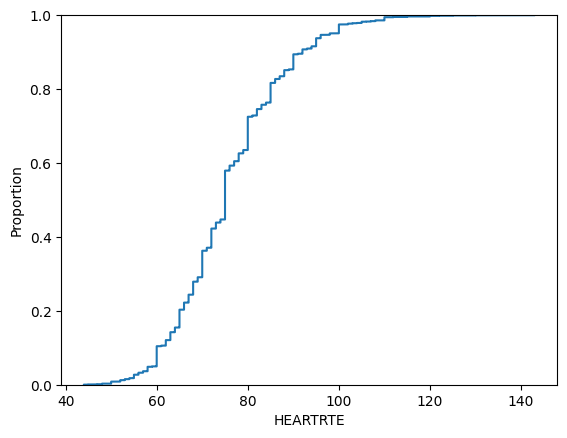

In [75]:
sns.ecdfplot(data=fmh, x='HEARTRTE')

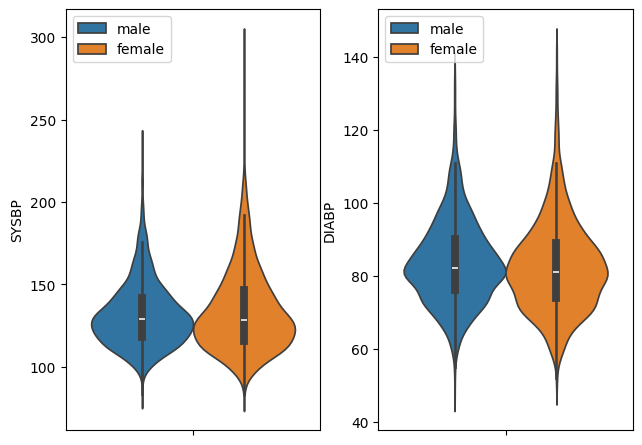

In [77]:
# violinplot
fig, axes = plt.subplots(1,2)
fig.tight_layout()
sns.violinplot(data=fmh,y='SYSBP', hue='SEX', ax=axes[0])
sns.violinplot(data=fmh,y='DIABP', hue='SEX', ax=axes[1])

axes[0].legend(loc="upper left")
axes[1].legend(loc="upper left");

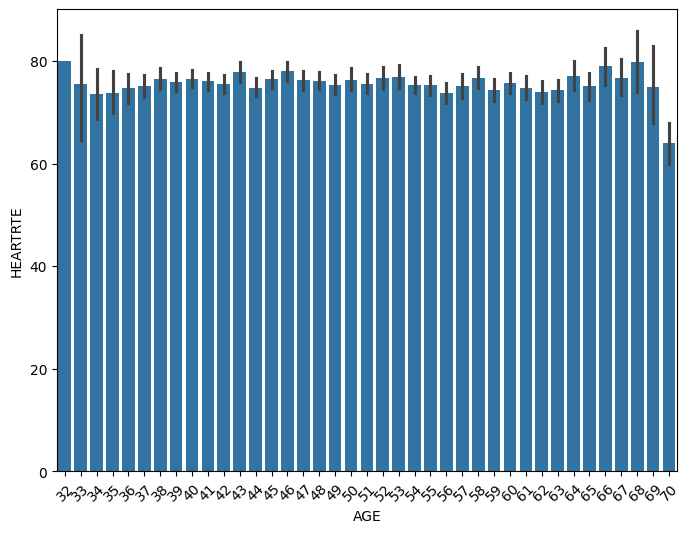

In [82]:
# barplot
plt.figure(figsize=(8,6))
ax = sns.barplot(data=fmh, x='AGE', y='HEARTRTE')

# # Overlapping labels
ax.tick_params(axis='x', labelsize=10, labelrotation = 45)
ax.tick_params(axis='y', labelsize=10)

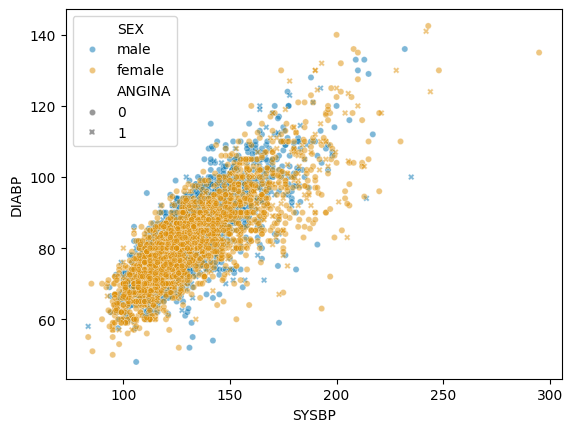

In [83]:
sns.scatterplot(fmh, x='SYSBP', y='DIABP', hue='SEX',style='ANGINA', palette='colorblind', s=20, alpha=0.5);

<Axes: xlabel='SYSBP', ylabel='DIABP'>

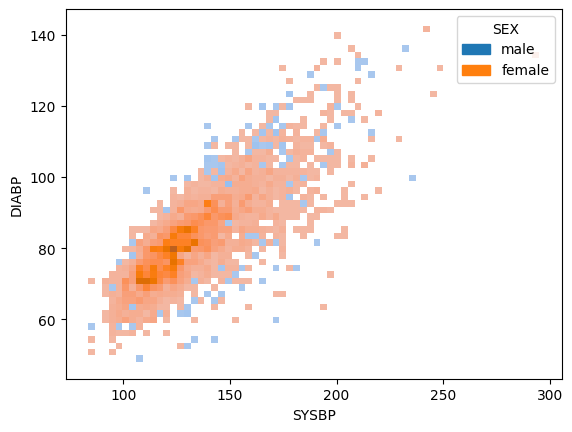

In [84]:
sns.histplot(data=fmh,x='SYSBP',y='DIABP',  hue='SEX')

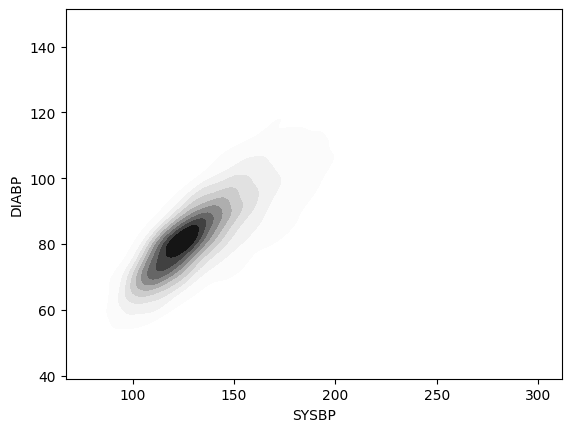

In [85]:
sns.kdeplot(fmh, x='SYSBP', y='DIABP', cmap='Greys', fill=True); # cmap='Greys', fill=True

<Axes: xlabel='SYSBP', ylabel='DIABP'>

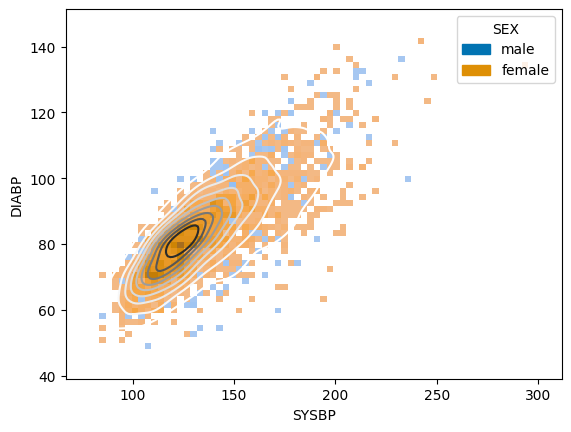

In [87]:
# combine kdeplot and histplot
sns.kdeplot(fmh, x='SYSBP', y='DIABP', cmap='Greys')
sns.histplot(data=fmh,x='SYSBP',y='DIABP',  hue='SEX', palette="colorblind")

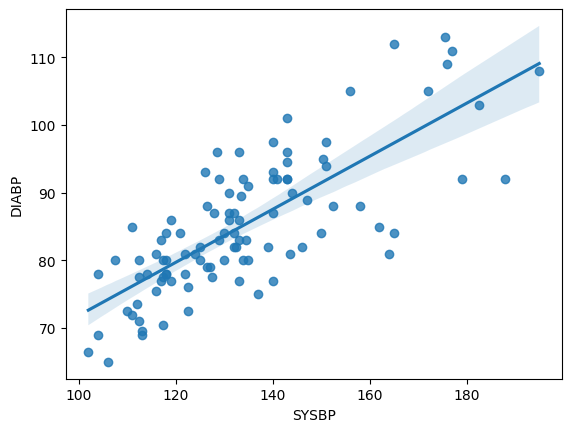

In [90]:
# axes-level lm
p =sns.regplot(fmh.sample(100), x='SYSBP', y='DIABP')

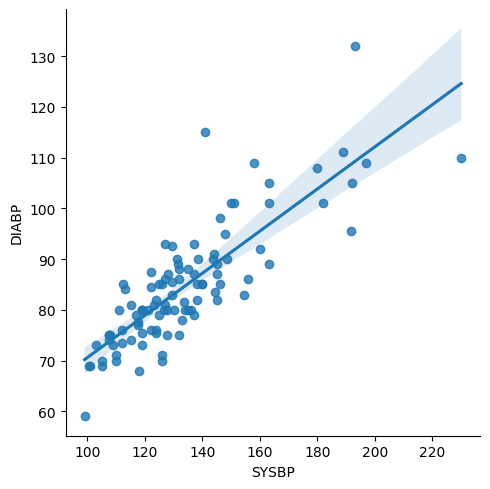

In [91]:
p = sns.lmplot(fmh.sample(100), x='SYSBP', y='DIABP') # lowess requires statsmodels module ; line_kws={'color': 'red'}

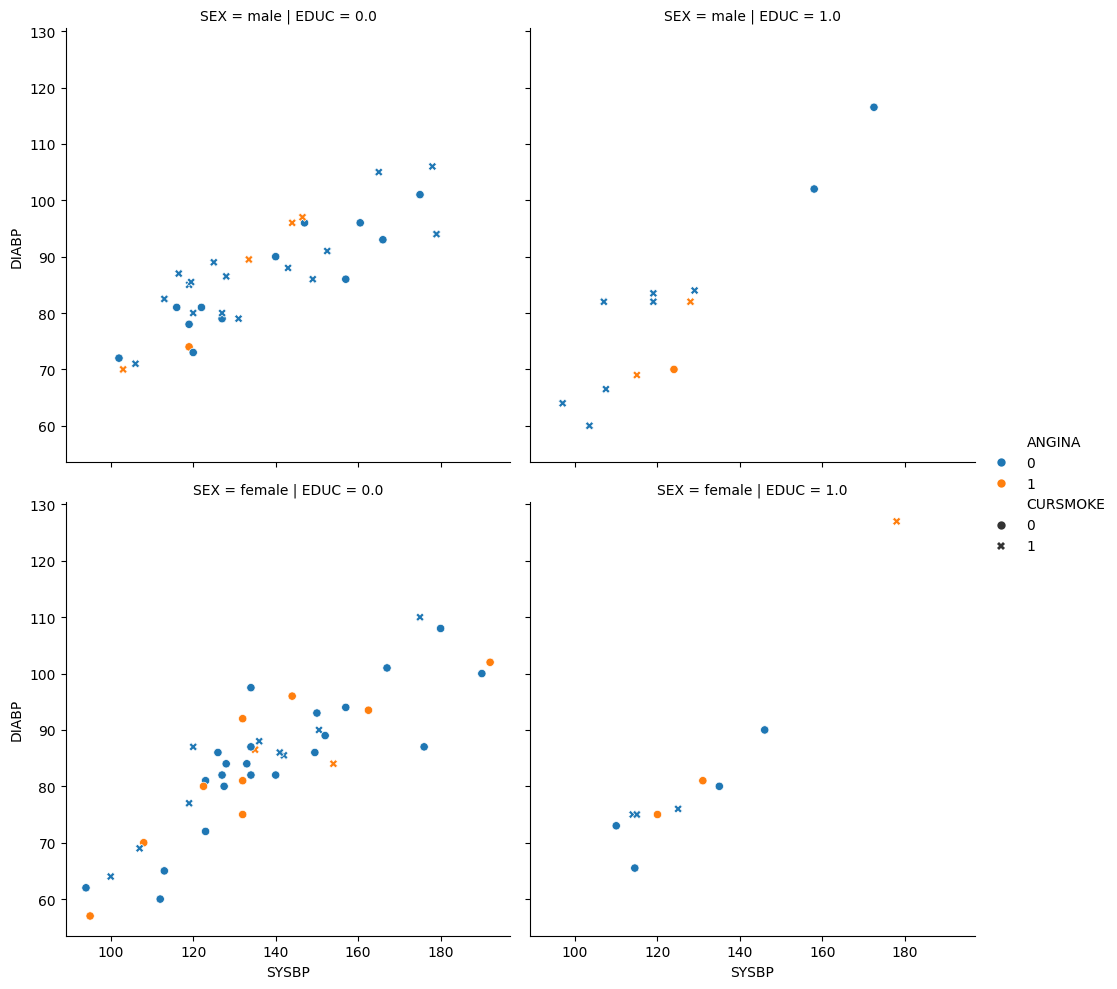

In [92]:
# FacetGrid
p = sns.relplot(fmh.sample(100), x='SYSBP', y='DIABP', row='SEX', col='EDUC', hue='ANGINA', style='CURSMOKE')

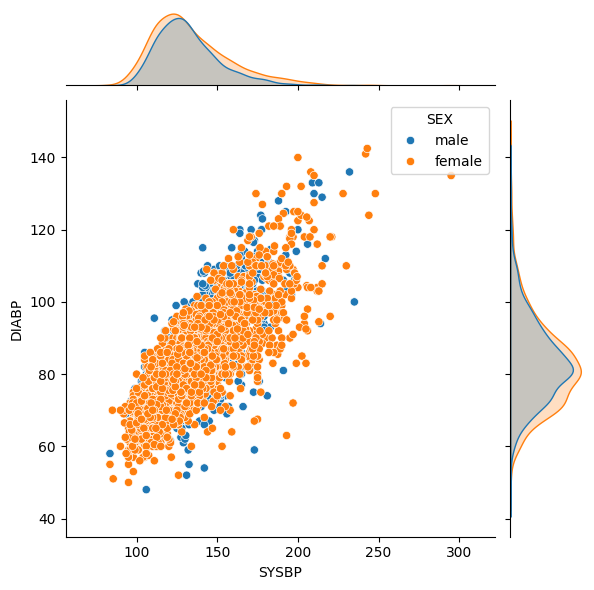

In [96]:
# JointGrid
jg = sns.jointplot(fmh, x='SYSBP', y='DIABP', hue='SEX', kind='scatter') # 'scatter', 'hist', 'kde'
                                                                        # see jg.plot_joint(...) and jg.plot_marginals(...)

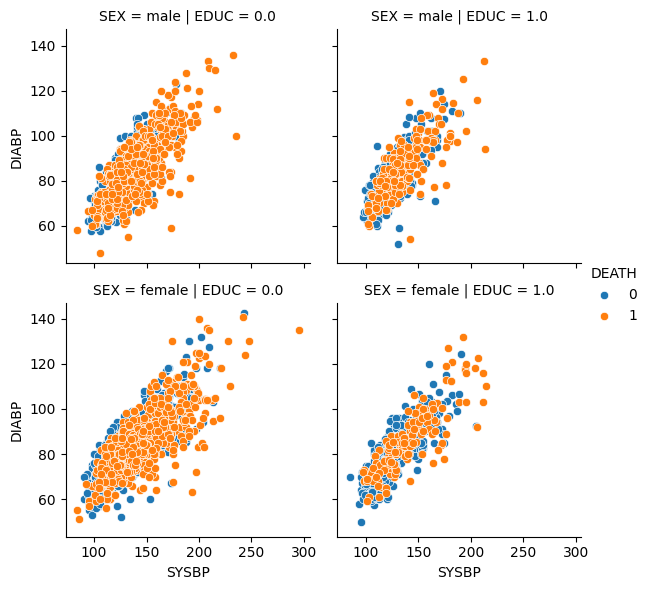

In [97]:
fg = sns.FacetGrid(data=fmh,row='SEX', col='EDUC', hue="DEATH")
fg.map_dataframe(sns.scatterplot, x='SYSBP', y='DIABP')
fg.add_legend()

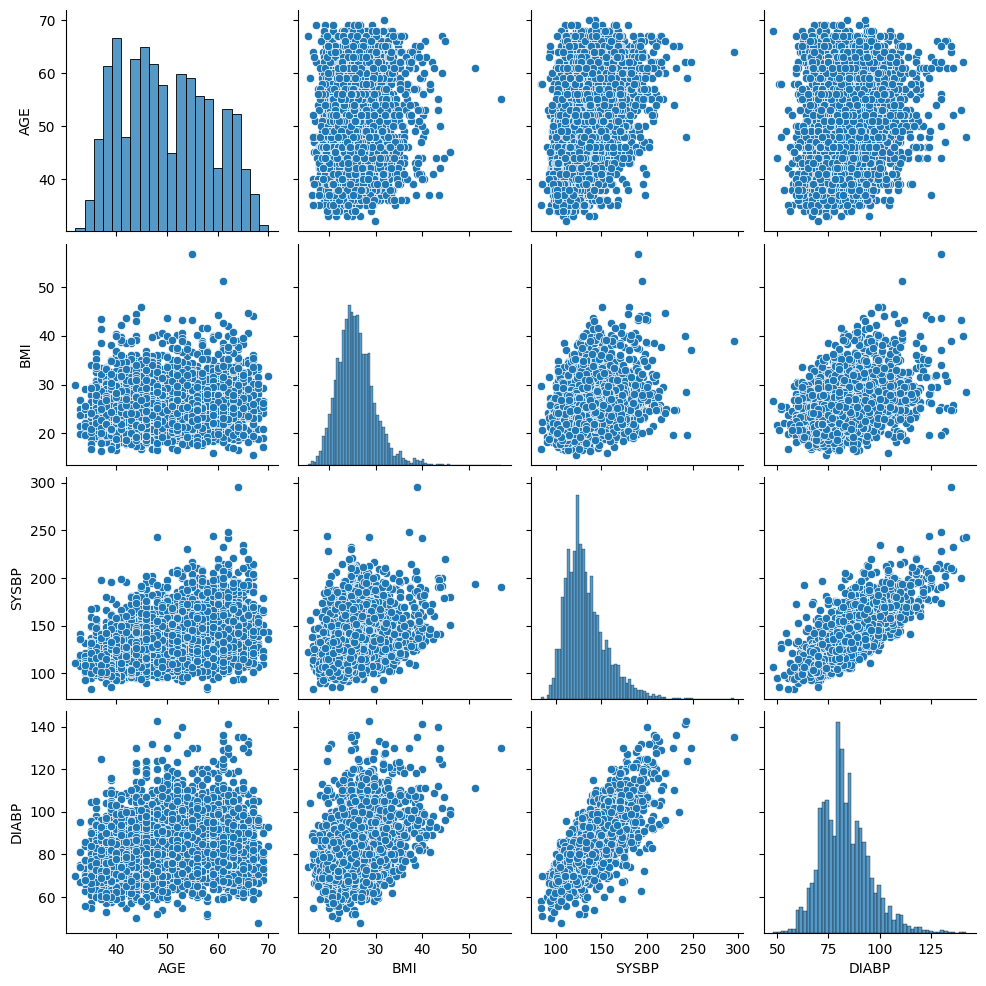

In [98]:
sns.pairplot(data=fmh[['AGE','BMI','SYSBP','DIABP']])

<Axes: >

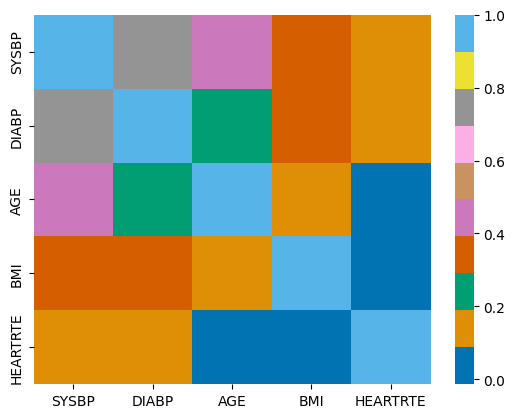

In [99]:
sns.heatmap(fmh[['SYSBP','DIABP','AGE','BMI','HEARTRTE']].corr(), cmap=sns.color_palette('colorblind'))
